# **Telco Analytics: Customer Churn Prediction**

Created By: Alfriando C Vean

---

## Business Problem Understanding

### Context
Sebuah perusahaan penyedia layanan telekomunikasi ingin memahami perilaku pelanggan dalam hal berhenti berlangganan (churn). Setiap bulannya, perusahaan kehilangan sebagian pelanggan, yang dapat berdampak pada pendapatan dan stabilitas operasional. Untuk itu, penting bagi perusahaan terutama bagian Customer Success atau Marketing Manager untuk memprediksi pelanggan mana yang kemungkinan besar akan churn, sehingga strategi retensi dapat dilakukan lebih awal. Prediksi yang dilakukan akan menggunakan pendekatan machine learning, agar proses berjalan secara otomatis dan mengurangi sisi subjektifitas jika proses seleksi dilakukan oleh manusia.

### Target:
- 0: Tidak berhenti berlangganan/Tidak Churn (No)
- 1: Berhenti berlangganan/Churn (Yes)

### Problem Statement:
Biaya untuk mendapatkan pelanggan baru jauh lebih besar dibanding mempertahankan pelanggan lama. Oleh karena itu, perusahaan ingin mengurangi angka churn dengan mengidentifikasi pelanggan berisiko tinggi secara lebih dini.

Dengan memanfaatkan data pelanggan yang telah tersedia (misalnya: durasi berlangganan, penggunaan layanan internet, kontrak, tagihan bulanan, dsb), perusahaan ingin membangun model klasifikasi prediktif dengan machine learning dengan tujuan mendeteksi pelanggan yang ingin churn sehingga dapat menargetkan strategi untuk pelanggan-pelanggan yang teridentifikasi.

### Goals:
1. Memprediksi apakah seorang pelanggan akan berhenti berlangganan atau tidak.
2. Mengidentifikasi faktor-faktor utama yang berkontribusi terhadap churn.
3. Membantu tim marketing dan retention dalam mengambil keputusan berbasis data.

---

## Analytic Approach:
- Lakukan eksplorasi dan analisis data untuk memahami pola dan hubungan antara fitur dan target churn.
- Lakukan preprocessing data (encoding, scaling, dsb).
- Bangun beberapa model klasifikasi (Logistic Regression, Decision Tree, Random Forest, XGBoost, dll).
- Evaluasi model menggunakan metrik yang sesuai dengan business problem.

---

## Metric Evaluation

### Type 1 error (False Positive):
- Model memprediksi pelanggan akan churn, padahal tidak.
- Konsekuensi: Perusahaan mungkin menghabiskan sumber daya untuk mempertahankan pelanggan yang sebenarnya tidak akan churn.

### Type 2 error (False Negative):
- Model memprediksi pelanggan tidak akan churn, padahal sebenarnya akan churn.
- Konsekuensi: Pelanggan benar-benar pergi tanpa adanya tindakan pencegahan → kehilangan pendapatan.

> Karena perusahaan ingin **mengidentifikasi sebanyak mungkin pelanggan yang benar-benar akan churn**, maka metrik yang paling sesuai adalah **RECALL**

# Data

## Data Preparation

In [45]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import KBinsDiscretizer

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold, RandomizedSearchCV,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import set_config
set_config(display='diagram')
import lightgbm as lgb
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Interpretable AI
import shap

# ExportModel
import pickle

# Ignore Warning
import sys
import warnings
warnings.filterwarnings("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

# Set max rows
pd.set_option('display.max_columns', None)

df = pd.read_csv("data_telco_customer_churn.csv")

df.sample(10, random_state=14)

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
1472,Yes,5,No internet service,No internet service,No,No internet service,No internet service,One year,No,20.10,No
2510,Yes,71,Yes,Yes,Fiber optic,No,No,One year,Yes,85.45,No
4656,No,19,No,Yes,Fiber optic,No,No,Month-to-month,Yes,73.85,Yes
4223,No,17,No internet service,No internet service,No,No internet service,No internet service,One year,Yes,20.10,No
4380,No,52,Yes,No,DSL,Yes,No,Two year,No,59.85,No
2343,Yes,71,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.50,No
596,No,22,No,No,Fiber optic,No,No,Month-to-month,Yes,96.70,Yes
3704,No,24,No,No,DSL,Yes,Yes,Month-to-month,No,34.25,No
3282,No,35,No internet service,No internet service,No,No internet service,No internet service,Two year,No,21.45,No
1638,No,29,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,25.15,No


📑 Deskripsi Kolom Dataset

| Nama Kolom         | Deskripsi                                                                 |
|---------------------|---------------------------------------------------------------------------|
| **Dependents**       | Apakah pelanggan memiliki tanggungan (anak/keluarga) atau tidak.         |
| **Tenure**           | Jumlah bulan pelanggan telah berlangganan di perusahaan.                 |
| **OnlineSecurity**   | Status kepemilikan layanan keamanan online oleh pelanggan.               |
| **OnlineBackup**     | Status kepemilikan layanan pencadangan data online.                      |
| **InternetService**  | Jenis layanan internet yang digunakan oleh pelanggan.                    |
| **DeviceProtection** | Apakah pelanggan memiliki perlindungan perangkat atau tidak.             |
| **TechSupport**      | Apakah pelanggan memiliki layanan bantuan teknis atau tidak.             |
| **Contract**         | Jenis kontrak yang digunakan pelanggan (bulanan, tahunan, dll.).         |
| **PaperlessBilling** | Apakah pelanggan menerima tagihan dalam bentuk digital (tanpa kertas).   |
| **MonthlyCharges**   | Jumlah tagihan layanan yang harus dibayar pelanggan per bulan.           |
| **Churn**            | Status apakah pelanggan berhenti berlangganan atau tetap.                |


## Exploratory Data Analysis

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


Dataset memiliki 11 kolom dan 4930 baris, dengan 9 kolom bersifat kategorikal dan 2 kolom numerikal.

### Descriptive Statistic

In [47]:
df.describe()

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


In [48]:
df.describe(include='object')

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


### Missing Value

In [49]:
df.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

Tidak ada data kosong yang teridentifikasi.

### Duplicate

In [50]:
df.duplicated().sum()

np.int64(77)

Terdapat 77 baris data duplikat yang akan langsung dihapus.

In [51]:
df.drop_duplicates(inplace=True)

### Anomaly

In [52]:
# mengecek apakah ada nilai anomali pada kolom 'MonthlyCharges'
(df['MonthlyCharges'] < 0).sum()

np.int64(0)

In [53]:
# mengecek apakah ada nilai anomali pada kolom 'tenure'
(df['tenure'] < 0).sum()

np.int64(0)

In [54]:
# melihat 10 nilai teratas dari kolom 'MonthlyCharges'
df['MonthlyCharges'].sort_values(ascending=False).head(10)

56      118.65
799     118.60
3642    118.35
4691    118.20
1100    117.80
4222    117.60
4309    117.50
2701    117.45
2684    117.35
4828    117.20
Name: MonthlyCharges, dtype: float64

In [55]:
# melihat 10 nilai teratas dari kolom 'tenure
df['tenure'].sort_values(ascending=False).head(10)

1236    72
4144    72
3       72
4864    72
1213    72
1310    72
4152    72
3084    72
3159    72
2437    72
Name: tenure, dtype: int64

Tidak ada keanehan yang ditemukan pada kolom numerim yaitu `tenure` dan `MonthlyCharges`, sehingga tidak dilakukan penanganan apapun.

### Categorical Columns

In [56]:
# mengumpulkan kolom kategorikal
cat_cols = ['Dependents', 'OnlineSecurity', 'OnlineBackup',
                    'InternetService', 'DeviceProtection', 'TechSupport',
                    'Contract', 'PaperlessBilling']

In [57]:
def categorical_unique_summary(df):
    
    summary_data = []
    
    for col in cat_cols:
        unique_vals = df[col].unique()
        unique_vals_clean = [str(val) for val in unique_vals if pd.notna(val)]
        
        summary_data.append({
            'Column_Name': col,
            'Unique_Count': df[col].nunique(),
            'Unique_Values': ', '.join(unique_vals_clean)
        })
    
    return pd.DataFrame(summary_data)

categorical_df = categorical_unique_summary(df)
categorical_df

,Column_Name,Unique_Count,Unique_Values
0,Dependents,2,"Yes, No"
1,OnlineSecurity,3,"No, Yes, No internet service"
2,OnlineBackup,3,"No, Yes, No internet service"
3,InternetService,3,"DSL, Fiber optic, No"
4,DeviceProtection,3,"Yes, No internet service, No"
5,TechSupport,3,"Yes, No, No internet service"
6,Contract,3,"Month-to-month, Two year, One year"
7,PaperlessBilling,2,"Yes, No"


Mayoritas kolom kategorikal memiliki 3 unique values, hanya `PaperlessBilling` dan `Dependents` yang memiliki 2 unique values

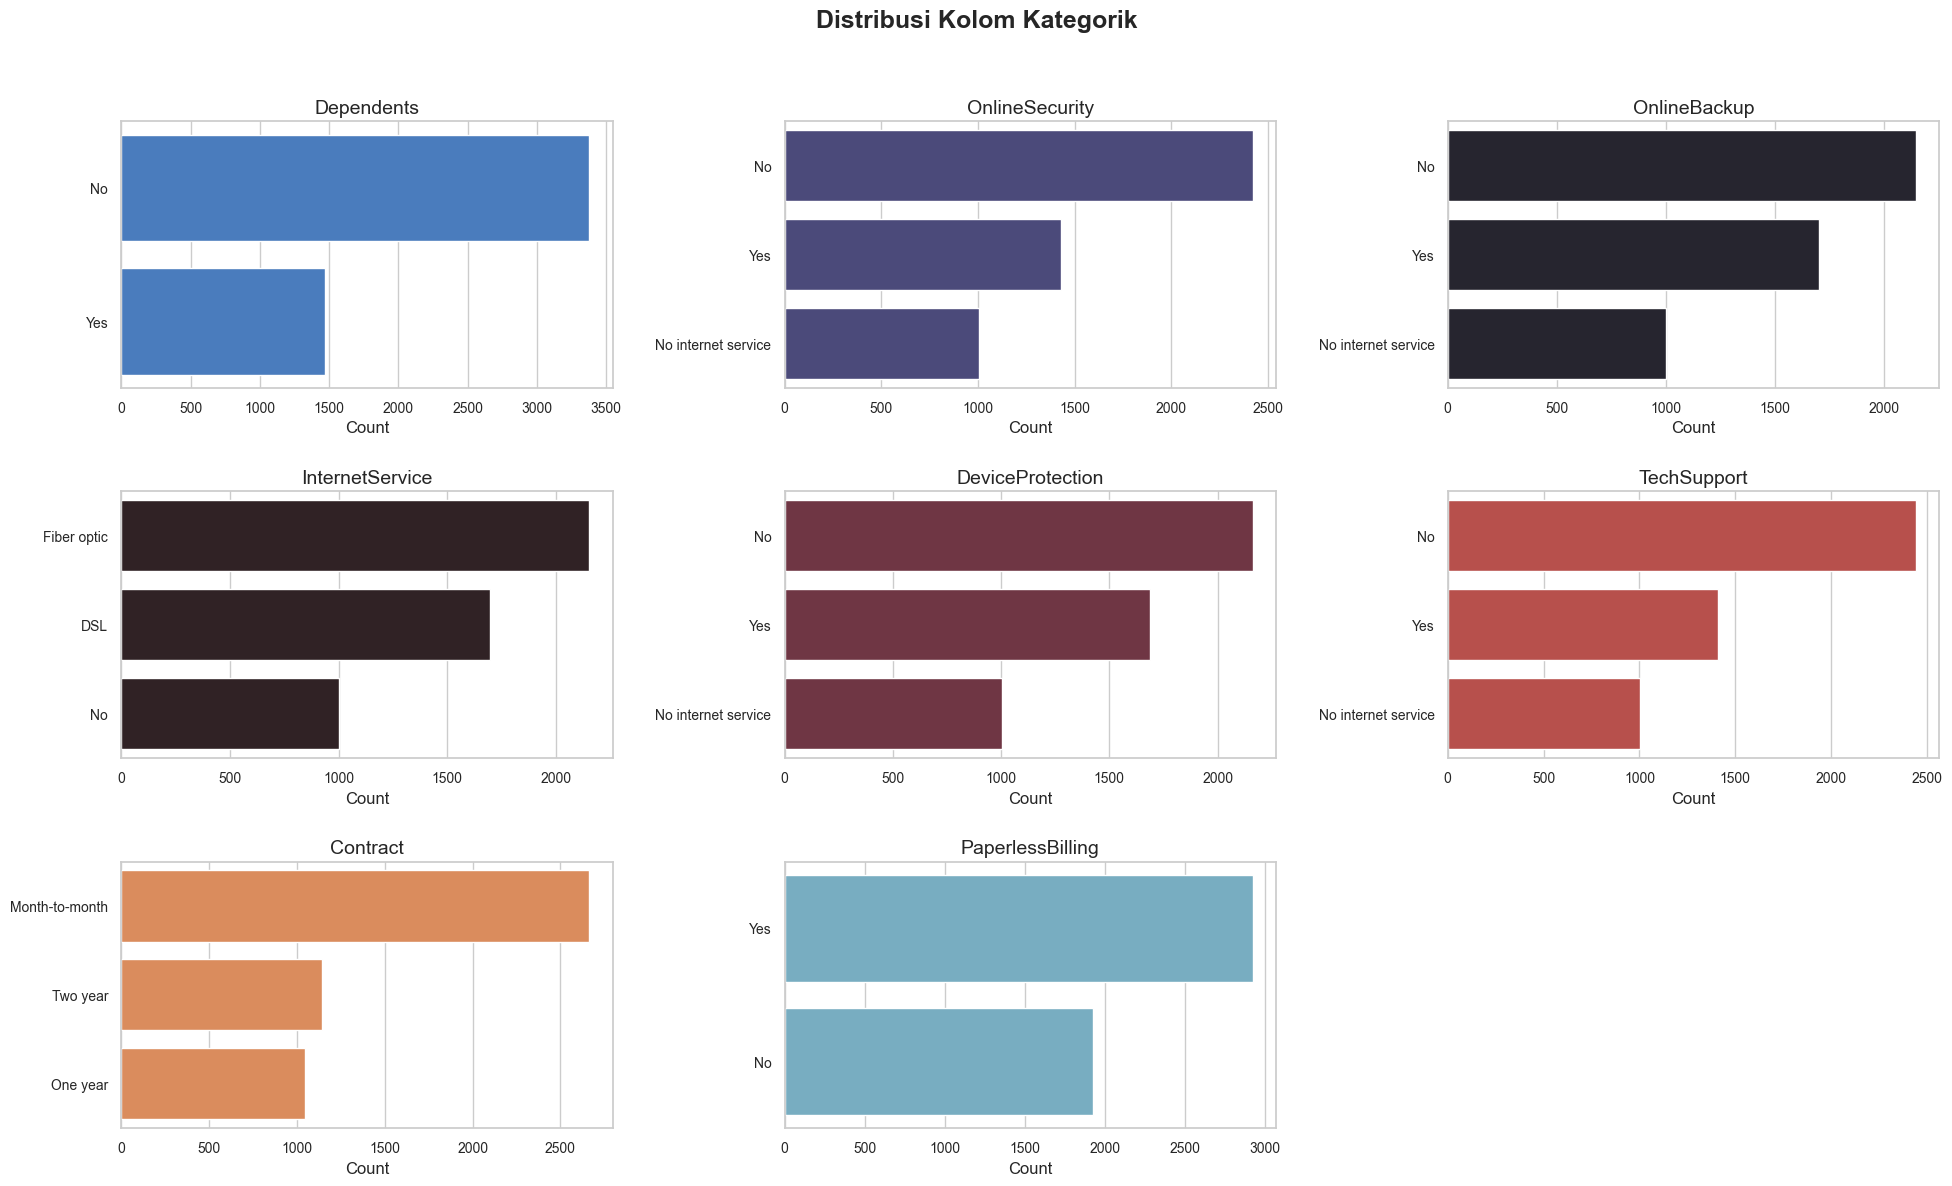

In [58]:
def shorten_text(text, max_length=20):
    return text[:max_length] + '...' if len(text) > max_length else text

cols_sum = len(cat_cols)
cols_rows = (cols_sum // 3) + (1 if cols_sum % 3 != 0 else 0)

palette = sns.color_palette("icefire", cols_sum)

plt.figure(figsize=(20, cols_rows * 4))

for i, col in enumerate(cat_cols, 1):
    ax = plt.subplot(cols_rows, 3, i)

    value_counts = df[col].value_counts().nlargest(10)

    shortened_labels = [shorten_text(str(label)) for label in value_counts.index]

    sns.barplot(y=shortened_labels, x=value_counts.values, color=palette[i % len(palette)], orient='h', ax=ax)
    ax.set_title(f'{col}', fontsize=14)
    ax.set_xlabel('Count')
    ax.set_ylabel('')

    ax.tick_params(axis='both', labelsize=10)

plt.suptitle("Distribusi Kolom Kategorik", fontsize=18, fontweight='bold', y=1)
plt.tight_layout(pad=2.0, h_pad=2.0, w_pad=2.0)
plt.show()

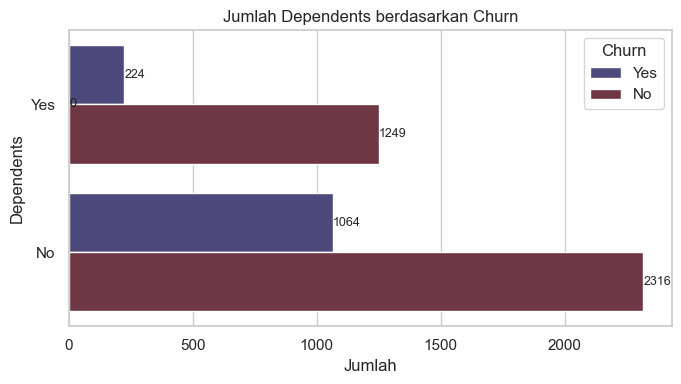

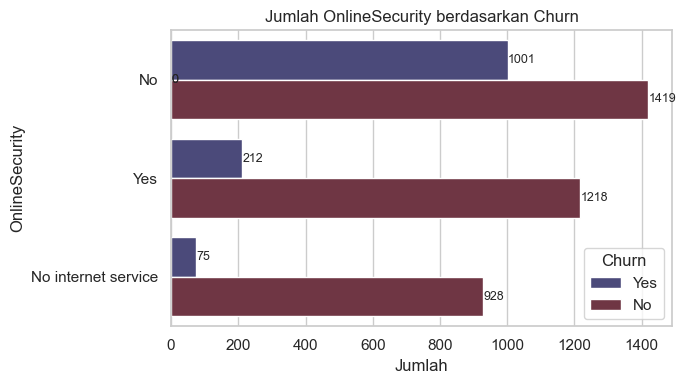

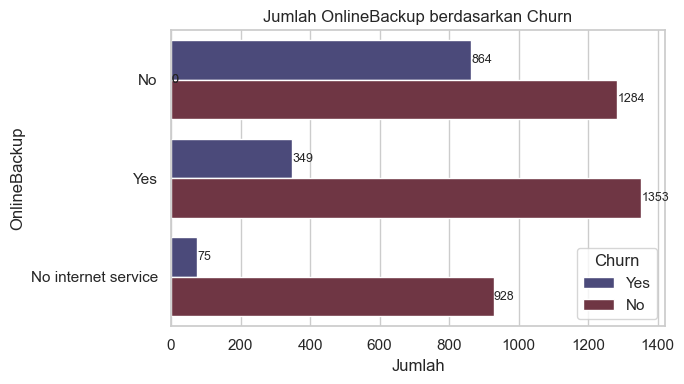

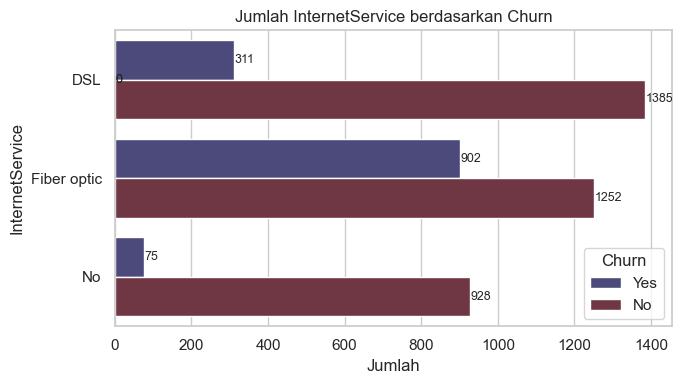

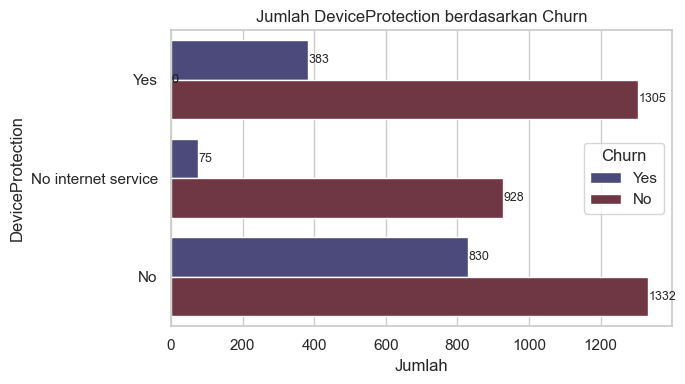

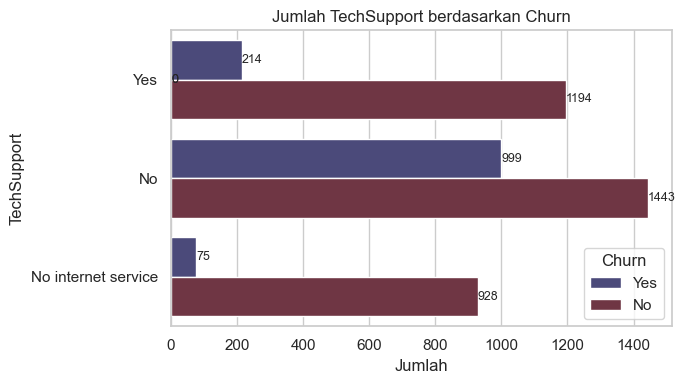

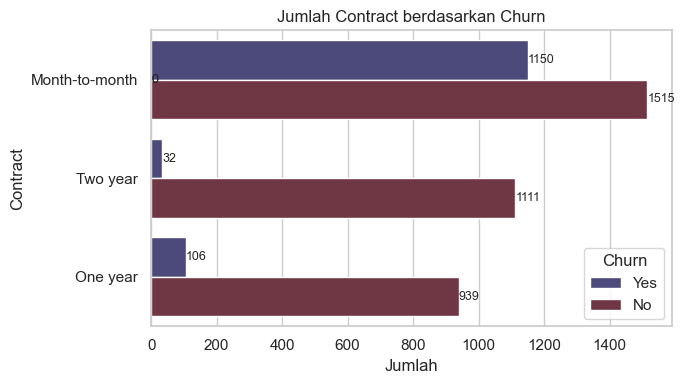

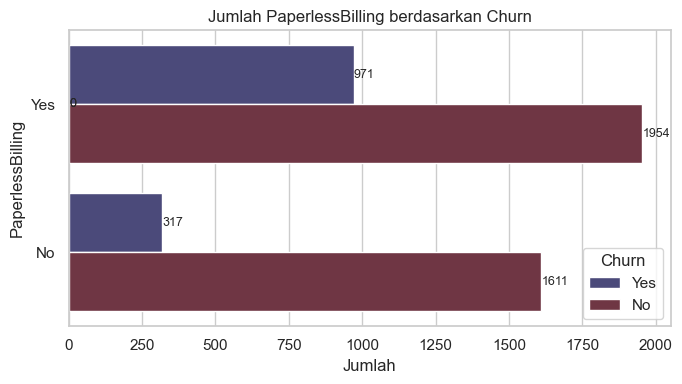

In [59]:
for col in cat_cols:
    plt.figure(figsize=(7, 4))
    ax = sns.countplot(data=df, y=col, hue='Churn', palette='icefire')
    plt.title(f'Jumlah {col} berdasarkan Churn')
    plt.ylabel(col)
    plt.xlabel("Jumlah")
    
    for p in ax.patches:
        width = p.get_width()
        ax.annotate(f'{int(width)}', (width + 1, p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()

Terlihat pada kolom-kolom yang memiliki value **No Internet Service** yaitu `OnlineSecurity`, `OnlineBackup`, `DevideProtection`, dan `TechSupport` memiliki distirbusi nilai yang sama dengan value **No** di kolom `InternetService`, sehingga nantinya value **No Internet Service** pada kolom-kolom tersebut akan disamakan dengan **No**.

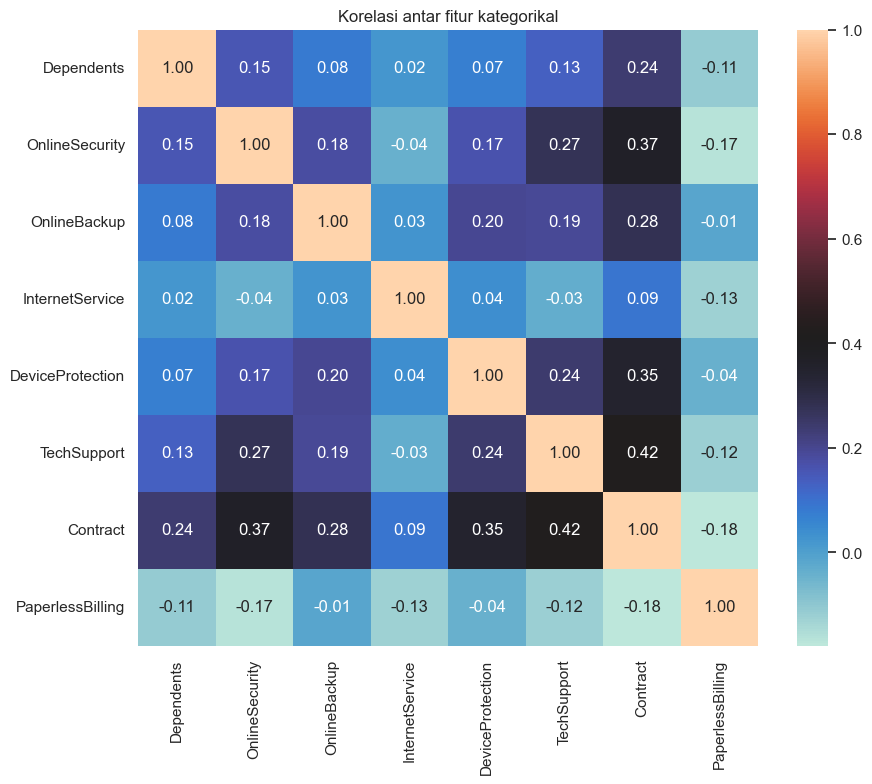

In [60]:
df_encoded = df[cat_cols].apply(LabelEncoder().fit_transform)

categorical_corr = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(categorical_corr, annot=True, cmap='icefire', fmt=".2f")
plt.title("Korelasi antar fitur kategorikal")
plt.show()

Tidak ada kolom yang berkorelasi tinggi antara satu dengan yang lain (tidak redundan), sehingga aman digunakan sebagai fitur untuk modeling.

### Numerical Columns

In [61]:
# mengunmpulkan kolom numerikal
num_cols = ['tenure', 'MonthlyCharges']

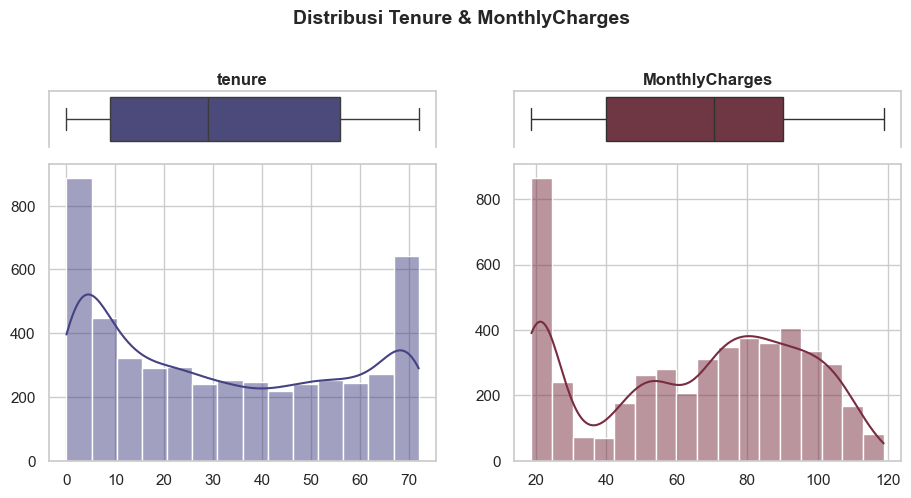

In [62]:
sns.set_theme(style='whitegrid')

palette = sns.color_palette("icefire", len(num_cols))
color_map = dict(zip(num_cols, palette))

n_cols = 2
n_rows = -(-len(num_cols) // n_cols)

fig, axes = plt.subplots(
    nrows=n_rows * 2,
    ncols=n_cols,
    figsize=(n_cols * 5.5, n_rows * 4.8),
    gridspec_kw={'height_ratios': [0.15, 0.80] * n_rows, 'hspace': 0.1}
)

if n_rows == 1:
    axes = axes.reshape(2, -1)

for idx, col in enumerate(num_cols):
    row = idx // n_cols
    col_pos = idx % n_cols

    ax_top = axes[row * 2, col_pos]
    ax_bot = axes[row * 2 + 1, col_pos]

    color = color_map[col]

    # Boxplot
    sns.boxplot(data=df, x=col, ax=ax_top, color=color)
    ax_top.set_title(col, fontsize=12, fontweight='bold', pad=5)
    ax_top.set_xlabel('')
    ax_top.set_xticks([])
    ax_top.set_ylabel('')
    ax_top.spines['bottom'].set_visible(False)

    # Histogram
    sns.histplot(data=df, x=col, ax=ax_bot, kde=True, color=color)
    ax_bot.set_xlabel('')
    ax_bot.set_ylabel('')

total_axes = n_rows * n_cols
for empty_idx in range(len(num_cols), total_axes):
    fig.delaxes(axes[(empty_idx // n_cols) * 2, empty_idx % n_cols])
    fig.delaxes(axes[(empty_idx // n_cols) * 2 + 1, empty_idx % n_cols])

plt.suptitle("Distribusi Tenure & MonthlyCharges", fontsize=14, fontweight='bold', y=1.05)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Distribusi menunjukkan bahwa `tenure` bersifat bimodal, dengan banyak pelanggan baru (0–5 bulan) dan pelanggan lama (65–72 bulan), sedangkan pelanggan dengan masa langganan menengah relatif sedikit, mengindikasikan kecenderungan pelanggan berhenti di awal atau bertahan lama. `MonthlyCharges` juga memiliki pola bimodal, dengan puncak pada biaya rendah (±$20–30) yang kemungkinan merepresentasikan layanan dasar, dan biaya menengah-tinggi (±$70–100) yang mencerminkan paket premium atau layanan tambahan, sementara pelanggan di rentang harga ekstrem relatif sedikit.

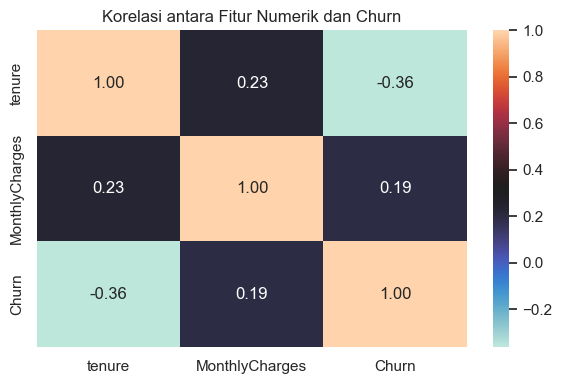

In [63]:
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(6, 4))
sns.heatmap(df_corr[['tenure', 'MonthlyCharges', 'Churn']].corr(), annot=True, cmap='icefire', fmt=".2f")
plt.title('Korelasi antara Fitur Numerik dan Churn')
plt.tight_layout()
plt.show()

Tidak ada korelasi yang tinggi juga antara fitur numerik dan juga label `Churn`, sehingga aman digunakan untuk modeling.

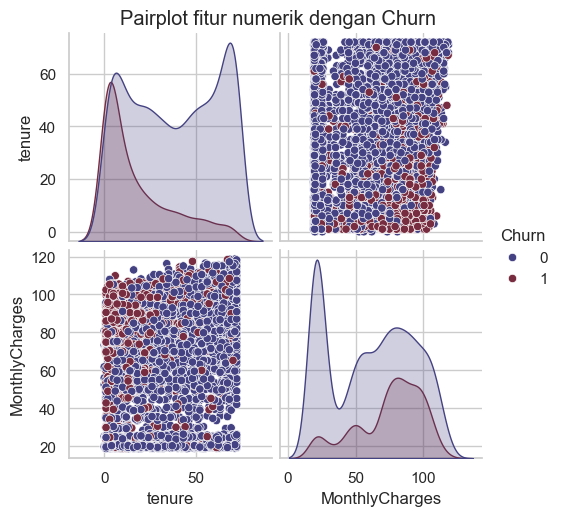

In [64]:
sns.pairplot(df_corr, hue='Churn', vars=num_cols, palette='icefire')
plt.suptitle('Pairplot fitur numerik dengan Churn', y=1.02)
plt.show()

Distribusi data pada `Dependents` dan `MonthlyCharges` terhadap `Churn` juga tidak membentuk pola apapun, menegaskan tidak adanya multikolinearitas pada data.

### Target Distribution

In [65]:
churn_counts = df['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']

fig = px.pie(
    churn_counts, 
    values='Count', 
    names='Churn', 
    title='Distribusi Churn Pelanggan',
    color= 'Churn',
    color_discrete_map={'Yes': 'Black', 'No': 'Purple'}
)
fig.show()


Ditemukan bahwa persebaran data pada target `Churn` tidak merata (imbalance) dengan **26,5%** pada kelas positif dan **73,5%** pada kelas negatif. Penanganan data imbalance perlu dilakukan pada saat modeling agar mencapai performa yang baik.

## Feature Engineering

### Target 

Karena label target tidak diproses di pipeline, maka encoding dilakukan terpisah. Encoding diberlakukan pada value **Yes** menjadi **1** dan **No** menjadi **0**.

In [66]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

### Split Data

Fitur dan target displit sebelum modeling, mencegah adanya data leakage. Proporsi yang diberlakukan adalah **80%** untuk **data training** dan **20%** untuk **data test**.

In [67]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=14
)

### Categorical Features

Kolom-kolom yang memiliki value **No Internet Service** yaitu `OnlineSecurity`, `OnlineBackup`, `DevideProtection`, dan `TechSupport` memiliki distirbusi nilai yang sama dengan value **No** di kolom `InternetService`, sehingga value **No Internet Service** pada kolom-kolom tersebut akan disamakan dengan **No**. Langkah ini diambil karena inti dari kedua value tersebut adalah bahwa customer **tidak menggunakan layanan**, sehingga aman untuk disamakan. Penyamarataan ini juga dapat mengefisiensi dimensi fitur yang digunakan untuk modeling. Proses encoding akan dilakukan menggunakan pipeline.

Setelah itu, semua kolom kategorikal akan di-encoding menggunakan metode One-Hot Encoding dengan parameter **drop='first'** untuk mengurangi dimensi dan mencegah multikolinearitas. Proses encoding akan dimasukkan ke dalam pipeline.

In [68]:
cols_to_simplify = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

for col in cols_to_simplify:
    df[col] = df[col].replace('No internet service', 'No')

### Numerical Features

Terdapat beberapa model klasifikasi yang membutuhkan dan tidak membutuhkan proses scaling, maka pipeline disesuaikan dengan modelnya. Untuk metode scaling yang digunakan adalah **RobustScaler** karena data tidak terdistribusi normal. Proses scaling sudah diautomasi menggunakan pipeline.

### Pipeline

In [69]:
# pipeline untuk Logistic Regression dan KNN yang butuh scaling
preprocessor_with_scaling = ColumnTransformer([
    ('num', RobustScaler(), num_cols),
    ('onehot', OneHotEncoder(drop='first'), cat_cols),
], remainder='passthrough')

preprocessor_with_scaling

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', RobustScaler(),
                                 ['tenure', 'MonthlyCharges']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Dependents', 'OnlineSecurity',
                                  'OnlineBackup', 'InternetService',
                                  'DeviceProtection', 'TechSupport', 'Contract',
                                  'PaperlessBilling'])])

Pada pipeline yang tidak mengandung scaling, kolom-kolom numerikal akan langsung dijadikan fitur dalam modeling tanpa adanya preprocess sebelumnya.

In [70]:
# pipeline untuk model yang tidak butuh scaling
preprocessor_without_scaling = ColumnTransformer([
    ('num', 'passthrough', num_cols),
    ('onehot', OneHotEncoder(drop='first'), cat_cols),
], remainder='passthrough')

preprocessor_without_scaling

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', 'passthrough',
                                 ['tenure', 'MonthlyCharges']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Dependents', 'OnlineSecurity',
                                  'OnlineBackup', 'InternetService',
                                  'DeviceProtection', 'TechSupport', 'Contract',
                                  'PaperlessBilling'])])

### Features Summary

In [71]:
# gambaran perbandingan nilai fitur sebelum dan sesudah preprocessing di pipeline
preprocessor = preprocessor_with_scaling

encoded_array = preprocessor.fit_transform(X)

encoded_feature_names = preprocessor.get_feature_names_out()

encoded_df = pd.DataFrame(encoded_array, columns=encoded_feature_names)

scaled_cols = [col for col in encoded_df.columns if 'num' in col]

onehot_cols = [col for col in encoded_df.columns if 'onehot' in col]

comparison_df = pd.concat([
    X[num_cols].reset_index(drop=True),                  # nilai asli numerik
    encoded_df[scaled_cols],                             # nilai setelah scaling
    X[cat_cols].reset_index(drop=True),                  # nilai asli kategorikal
    encoded_df[onehot_cols]                              # nilai setelah encoding
], axis=1)

comparison_df.sample(10, random_state=14)

,tenure,MonthlyCharges,num__tenure,num__MonthlyCharges,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,onehot__Dependents_Yes,onehot__OnlineSecurity_No internet service,onehot__OnlineSecurity_Yes,onehot__OnlineBackup_No internet service,onehot__OnlineBackup_Yes,onehot__InternetService_Fiber optic,onehot__InternetService_No,onehot__DeviceProtection_No internet service,onehot__DeviceProtection_Yes,onehot__TechSupport_No internet service,onehot__TechSupport_Yes,onehot__Contract_One year,onehot__Contract_Two year,onehot__PaperlessBilling_Yes
3402,12,94.55,-0.361702,0.479,No,No,No,Fiber optic,No,No,Month-to-month,No,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1942,35,91.00,0.127660,0.408,No,Yes,No,Fiber optic,No,No,Month-to-month,No,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
252,67,20.80,0.808511,-0.996,Yes,No internet service,No internet service,No,No internet service,No internet service,Two year,Yes,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
422,30,79.65,0.021277,0.181,No,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4626,65,67.05,0.765957,-0.071,No,Yes,Yes,DSL,Yes,No,One year,No,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4090,11,20.35,-0.382979,-1.005,No,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1485,59,94.05,0.638298,0.469,No,Yes,Yes,Fiber optic,Yes,Yes,One year,Yes,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
2574,72,23.30,0.914894,-0.946,Yes,No internet service,No internet service,No,No internet service,No internet service,One year,Yes,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4458,15,99.70,-0.297872,0.582,No,Yes,No,Fiber optic,No,No,Month-to-month,Yes,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4443,55,19.40,0.553191,-1.024,Yes,No internet service,No internet service,No,No internet service,No internet service,Two year,No,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


Preprocessing pada fitur menghasilkan 16 fitur final yang akan digunakan dalam modeling.

# Modeling

## Baseline

Berikut adalah kumpulan model klasifikasi yang digunakan untuk membandingkan performa, mulai dari model linear (Logistic Regression), non-linear (KNN, Decision Tree), hingga ensemble dan boosting models seperti Random Forest, XGBoost, LightGBM, AdaBoost, dan CatBoost. Proses modeling ini tetap dengan tujuan untuk mencari performa **Recall** terbaik.

In [72]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=14),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(random_state=14),
    'RandomForest': RandomForestClassifier(random_state=14),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=14),
    'LightGBM': lgb.LGBMClassifier(random_state=14),
    'AdaBoost': AdaBoostClassifier(random_state=14),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=14)
}

Pertama-tama, akan dicoba seluruh model terlebih dahulu tanpa perlakuan apapun.

In [73]:
results_baseline = []

for name, model in models.items():
    preprocessor = preprocessor_with_scaling if name in ['LogisticRegression', 'KNN'] else preprocessor_without_scaling

    pipe_base = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])

    pipe_base.fit(X_train, y_train)
    y_pred_train = pipe_base.predict(X_train)
    y_pred_test = pipe_base.predict(X_test)

    train_metrics = {
        'Accuracy': accuracy_score(y_train, y_pred_train),
        'Precision': precision_score(y_train, y_pred_train, average='binary', pos_label=1),
        'Recall': recall_score(y_train, y_pred_train, average='binary', pos_label=1),
        'F1 Score': f1_score(y_train, y_pred_train, average='binary', pos_label=1)
    }

    test_metrics = {
        'Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test, average='binary', pos_label=1),
        'Recall': recall_score(y_test, y_pred_test, average='binary', pos_label=1),
        'F1 Score': f1_score(y_test, y_pred_test, average='binary', pos_label=1)
    }

    results_baseline.append({
        'Model': name,
        'Train Recall': train_metrics['Recall'],
        'Test Recall': test_metrics['Recall'],
        'Train Accuracy': train_metrics['Accuracy'],
        'Test Accuracy': test_metrics['Accuracy'],
        'Train Precision': train_metrics['Precision'],
        'Test Precision': test_metrics['Precision'],
        'Train F1': train_metrics['F1 Score'],
        'Test F1': test_metrics['F1 Score']
    })

results_baseline_df = pd.DataFrame(results_baseline)
print("\\Hasil Baseline Model:")
results_baseline_df.sort_values(by='Test Recall', ascending=False).round(3)

[LightGBM] [Info] Number of positive: 1030, number of negative: 2852
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 356
[LightGBM] [Info] Number of data points in the train set: 3882, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265327 -> initscore=-1.018462
[LightGBM] [Info] Start training from score -1.018462
\Hasil Baseline Model:


,Model,Train Recall,Test Recall,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train F1,Test F1
0,LogisticRegression,0.538,0.484,0.796,0.789,0.637,0.635,0.583,0.549
5,LightGBM,0.700,0.484,0.871,0.768,0.791,0.576,0.743,0.526
4,XGBoost,0.808,0.465,0.914,0.763,0.860,0.566,0.833,0.511
1,KNN,0.604,0.465,0.839,0.765,0.740,0.571,0.665,0.513
7,CatBoost,0.649,0.465,0.858,0.775,0.778,0.600,0.707,0.524
3,RandomForest,0.989,0.453,0.994,0.772,0.987,0.594,0.988,0.514
6,AdaBoost,0.472,0.422,0.798,0.791,0.670,0.669,0.554,0.518
2,DecisionTree,0.977,0.419,0.994,0.709,1.000,0.448,0.988,0.433


## Hyperparameter Tuned

Didapatkan seluruh performa model awal masih underperform dengan mayoritas model overfitting pada data train untuk metrik Recall. Pada data test, seluruh model mendapatkan Recall sebesar 0.40-an. Selanjutnya akan mencoba dengan tuning hyperparameter pada seluruh model karena jumlah data yang tergolong sedikit, sehingga tidak akan memberatkan proses komputasi. 

In [74]:
param_grids = {
    'LogisticRegression': {
        'model__C': [0.01, 0.1, 1, 10]
    },
    'KNN': {
        'model__n_neighbors': [3, 5, 7],
        'model__weights': ['uniform', 'distance']
    },
    'DecisionTree': {
        'model__max_depth': [3, 5, 10, 15, None],
        'model__min_samples_split': [2, 5, 10],
    },
    'RandomForest': {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [5, 10, 15, None]
    },
    'XGBoost': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 6]
    },
    'LightGBM': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__num_leaves': [15, 31]
    },
    'AdaBoost': {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.5, 1.0]
    },
    'CatBoost': {
        'model__learning_rate': [0.03, 0.1],
        'model__depth': [4, 6, 8],
        'model__iterations': [100, 200]
    }
}

Hyperparameter yang digunakan masih sedikit kombinasinya, karena pada tahap ini masih proses mencari model terbaik yang ingin dikembangkan.

In [75]:
results_tuning = []

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=14) 
for name, model in models.items():
    preprocessor = preprocessor_with_scaling if name in ['LogisticRegression', 'KNN'] else preprocessor_without_scaling

    tuning_pipe = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])

    search = RandomizedSearchCV(
        estimator=tuning_pipe,
        param_distributions=param_grids[name],
        cv=cv_strategy,
        n_iter=5,
        scoring='recall',
        n_jobs=-1,
        random_state=14
    )

    search.fit(X_train, y_train)
    print(f"{name} best params:", search.best_params_)
    best_model = search.best_estimator_

    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    train_metrics = {
        'Accuracy': accuracy_score(y_train, y_pred_train),
        'Precision': precision_score(y_train, y_pred_train, average='binary', pos_label=1),
        'Recall': recall_score(y_train, y_pred_train, average='binary', pos_label=1),
        'F1 Score': f1_score(y_train, y_pred_train, average='binary', pos_label=1)
    }

    test_metrics = {
        'Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test, average='binary', pos_label=1),
        'Recall': recall_score(y_test, y_pred_test, average='binary', pos_label=1),
        'F1 Score': f1_score(y_test, y_pred_test, average='binary', pos_label=1)
    }

    results_tuning.append({
        'Model': name,
        'Train Recall': train_metrics['Recall'],
        'Test Recall': test_metrics['Recall'],
        'Train Accuracy': train_metrics['Accuracy'],
        'Test Accuracy': test_metrics['Accuracy'],
        'Train Precision': train_metrics['Precision'],
        'Test Precision': test_metrics['Precision'],
        'Train F1': train_metrics['F1 Score'],
        'Test F1': test_metrics['F1 Score']
    })

results_tuning_df = pd.DataFrame(results_tuning)
print("\\Hasil Tuning Model:")
results_tuning_df.sort_values(by='Test Recall', ascending=False).round(3)

LogisticRegression best params: {'model__C': 10}
KNN best params: {'model__weights': 'uniform', 'model__n_neighbors': 3}
DecisionTree best params: {'model__min_samples_split': 10, 'model__max_depth': 5}
RandomForest best params: {'model__n_estimators': 300, 'model__max_depth': 10}
XGBoost best params: {'model__n_estimators': 200, 'model__max_depth': 3, 'model__learning_rate': 0.1}
[LightGBM] [Info] Number of positive: 1030, number of negative: 2852
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 356
[LightGBM] [Info] Number of data points in the train set: 3882, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265327 -> initscore=-1.018462
[LightGBM] [Info] Start training from score -1.018462
LightGBM best params: {'model__num_leaves': 31, 'model__n_estimators': 100, 'model__learning_rate': 0.1}
AdaBoost best params:

,Model,Train Recall,Test Recall,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train F1,Test F1
2,DecisionTree,0.646,0.570,0.801,0.767,0.620,0.561,0.632,0.565
3,RandomForest,0.700,0.496,0.871,0.786,0.791,0.621,0.743,0.552
0,LogisticRegression,0.540,0.488,0.796,0.789,0.635,0.633,0.584,0.551
4,XGBoost,0.602,0.484,0.833,0.778,0.721,0.601,0.656,0.536
5,LightGBM,0.700,0.484,0.871,0.768,0.791,0.576,0.743,0.526
1,KNN,0.702,0.473,0.870,0.764,0.785,0.567,0.741,0.516
7,CatBoost,0.555,0.473,0.820,0.783,0.703,0.619,0.620,0.536
6,AdaBoost,0.472,0.422,0.798,0.791,0.670,0.669,0.554,0.518


Hasil dengan tuning parameter sederhana menunjukkan sedikit kenaikan, walaupun memang secara performa masih sangat jauh dari ekspektasi. Maka dari itu diputuskan untuk menambah tahap preprocessing baru yaitu dengan teknik oversampling SMOTE.

## Hyperparameter Tuned + SMOTE

In [76]:
results_tuning_smote = []

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=14) 
for name, model in models.items():
    preprocessor = preprocessor_with_scaling if name in ['LogisticRegression', 'KNN'] else preprocessor_without_scaling

    smote_tuning_pipe = Pipeline([
        ('preprocess', preprocessor),
        ('smote', SMOTE(random_state=14)),
        ('model', model)
    ])

    search = RandomizedSearchCV(
        estimator=smote_tuning_pipe,
        param_distributions=param_grids[name],
        cv=cv_strategy,
        n_iter=5,
        scoring='recall',
        n_jobs=-1,
        random_state=14
    )

    search.fit(X_train, y_train)
    print(f"{name} best params:", search.best_params_)
    best_model = search.best_estimator_

    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    train_metrics = {
        'Accuracy': accuracy_score(y_train, y_pred_train),
        'Precision': precision_score(y_train, y_pred_train, average='binary', pos_label=1),
        'Recall': recall_score(y_train, y_pred_train, average='binary', pos_label=1),
        'F1 Score': f1_score(y_train, y_pred_train, average='binary', pos_label=1)
    }

    test_metrics = {
        'Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test, average='binary', pos_label=1),
        'Recall': recall_score(y_test, y_pred_test, average='binary', pos_label=1),
        'F1 Score': f1_score(y_test, y_pred_test, average='binary', pos_label=1)
    }

    results_tuning_smote.append({
        'Model': name,
        'Train Recall': train_metrics['Recall'],
        'Test Recall': test_metrics['Recall'],
        'Train Accuracy': train_metrics['Accuracy'],
        'Test Accuracy': test_metrics['Accuracy'],
        'Train Precision': train_metrics['Precision'],
        'Test Precision': test_metrics['Precision'],
        'Train F1': train_metrics['F1 Score'],
        'Test F1': test_metrics['F1 Score']
    })

results_tuning_smote_df = pd.DataFrame(results_tuning_smote)
print("\\Hasil Tuning Model dengan SMOTE:")
results_tuning_smote_df.sort_values(by='Test Recall', ascending=False).round(3)

LogisticRegression best params: {'model__C': 10}
KNN best params: {'model__weights': 'uniform', 'model__n_neighbors': 7}
DecisionTree best params: {'model__min_samples_split': 5, 'model__max_depth': 3}
RandomForest best params: {'model__n_estimators': 100, 'model__max_depth': 5}
XGBoost best params: {'model__n_estimators': 200, 'model__max_depth': 3, 'model__learning_rate': 0.01}
[LightGBM] [Info] Number of positive: 2852, number of negative: 2852
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2186
[LightGBM] [Info] Number of data points in the train set: 5704, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM best params: {'model__num_leaves': 31, 'model__n_estimators': 100, 'model__learning_rate': 0.01}
AdaBoost be

,Model,Train Recall,Test Recall,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train F1,Test F1
2,DecisionTree,0.900,0.864,0.666,0.633,0.437,0.410,0.588,0.556
0,LogisticRegression,0.819,0.783,0.748,0.740,0.516,0.508,0.633,0.616
4,XGBoost,0.820,0.760,0.748,0.720,0.515,0.483,0.633,0.590
6,AdaBoost,0.807,0.752,0.753,0.725,0.523,0.489,0.634,0.592
3,RandomForest,0.789,0.736,0.776,0.752,0.555,0.523,0.652,0.612
1,KNN,0.862,0.705,0.797,0.718,0.579,0.479,0.692,0.571
7,CatBoost,0.753,0.702,0.776,0.752,0.558,0.525,0.641,0.600
5,LightGBM,0.725,0.643,0.814,0.765,0.629,0.550,0.674,0.593


Dengan penambahan teknik oversampling SMOTE, Recall dari model-model sudah semakin baik, dengan **Decision Tree** dan **Logistic Regression** memiliki performa terbaik. Maka dari itu, kedua model ini akan diseleksi lagi untuk menjadi model akhir. Alasan pemilihan kedua model ini bukan hanya karena performa yang bagus, tapi juga karena kedua model ini masuk ke dalam kategori model yang bisa di-interpretasi (**Interpretable AI**).

In [77]:
smote_tuning_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', 'passthrough',
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling'])])),
                ('smote', SMOTE(random_state=14)),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x00000175F6B5F380>)])

## Advance Hyperparameter Tuned on Best Model Scenario

In [78]:
best_params = {
    'LogisticRegression': [
        {   # L1 penalty
            'model__penalty': ['l1'],
            'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
            'model__solver': ['liblinear', 'saga'],
            'model__l1_ratio': [None]
        },
        {   # L2 penalty
            'model__penalty': ['l2'],
            'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
            'model__solver': ['liblinear', 'saga'],
            'model__l1_ratio': [None]
        },
        {   # ElasticNet penalty
            'model__penalty': ['elasticnet'],
            'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
            'model__solver': ['saga'],
            'model__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
        },
        {   # No penalty
            'model__penalty': ['none'],
            'model__solver': ['saga', 'lbfgs'],
            'model__l1_ratio': [None]
        }
    ],

    'DecisionTree': {
        'model__criterion': ['gini', 'entropy', 'log_loss'],
        'model__max_depth': [3, 5, 10, 15, 20, None],
        'model__min_samples_split': [2, 5, 10, 20],
        'model__min_samples_leaf': [1, 2, 4, 6],
        'model__max_features': ['sqrt', 'log2', None],
    }
}

Pada **Logistic Regression**, ditmabah hyperparameter seperti penalty, solver, dll., sedangkan pada **Decision Tree** ditambahkan hyperparameter seperti criterion, max features, dll.

In [79]:
best_models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=14),
    'DecisionTree': DecisionTreeClassifier(random_state=14)
}

results_best = []

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=14) 
for name, model in best_models.items():
    preprocessor = preprocessor_with_scaling if name in ['LogisticRegression'] else preprocessor_without_scaling

    smote_tuning_pipe = Pipeline([
        ('preprocess', preprocessor),
        ('smote', SMOTE(random_state=14)),
        ('model', model)
    ])

    search = RandomizedSearchCV(
        estimator=smote_tuning_pipe,
        param_distributions=best_params[name],
        cv=cv_strategy,
        n_iter=5,
        scoring='recall',
        n_jobs=-1,
        random_state=14
    )

    search.fit(X_train, y_train)
    print(f"{name} best params:", search.best_params_)
    best_model = search.best_estimator_

    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    train_metrics = {
        'Accuracy': accuracy_score(y_train, y_pred_train),
        'Precision': precision_score(y_train, y_pred_train, average='binary', pos_label=1),
        'Recall': recall_score(y_train, y_pred_train, average='binary', pos_label=1),
        'F1 Score': f1_score(y_train, y_pred_train, average='binary', pos_label=1)
    }

    test_metrics = {
        'Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test, average='binary', pos_label=1),
        'Recall': recall_score(y_test, y_pred_test, average='binary', pos_label=1),
        'F1 Score': f1_score(y_test, y_pred_test, average='binary', pos_label=1)
    }

    results_best.append({
        'Model': name,
        'Train Recall': train_metrics['Recall'],
        'Test Recall': test_metrics['Recall'],
        'Train Accuracy': train_metrics['Accuracy'],
        'Test Accuracy': test_metrics['Accuracy'],
        'Train Precision': train_metrics['Precision'],
        'Test Precision': test_metrics['Precision'],
        'Train F1': train_metrics['F1 Score'],
        'Test F1': test_metrics['F1 Score']
    })

results_best_df  = pd.DataFrame(results_best)
print("Hasil Model Terbaik:")
results_best_df.sort_values(by='Test Recall', ascending=False).round(3)

LogisticRegression best params: {'model__solver': 'saga', 'model__penalty': 'elasticnet', 'model__l1_ratio': 0.7, 'model__C': 10}
DecisionTree best params: {'model__min_samples_split': 20, 'model__min_samples_leaf': 4, 'model__max_features': None, 'model__max_depth': 3, 'model__criterion': 'log_loss'}
Hasil Model Terbaik:


,Model,Train Recall,Test Recall,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train F1,Test F1
1,DecisionTree,0.900,0.864,0.666,0.633,0.437,0.410,0.588,0.556
0,LogisticRegression,0.819,0.783,0.748,0.740,0.516,0.508,0.633,0.616


Tidak ada perbedaan pada hasil evaluasi dengan tuning hyperparameter yang ditingkatkan.

## Binning Scenario

Selanjutnya, akan dicoba skenario untuk melakukan binning pada kolom-kolom numerikal, dengan jumlah bin = 6 (karena nilai max pada `tenure` adalah 72 yang merupakan kelipatan 6, agar pembagian bin merata)

In [80]:
preprocessor_with_scaling_with_binning = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('binning', KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')),
            ('scaler', RobustScaler())]), num_cols),
        ('onehot', OneHotEncoder(drop='first'), cat_cols)
        ], remainder='passthrough')

preprocessor_with_scaling_with_binning

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('binning',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=6,
                                                                   strategy='uniform')),
                                                 ('scaler', RobustScaler())]),
                                 ['tenure', 'MonthlyCharges']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Dependents', 'OnlineSecurity',
                                  'OnlineBackup', 'InternetService',
                                  'DeviceProtection', 'TechSupport', 'Contract',
                                  'PaperlessBilling'])])

In [81]:
preprocessor_without_scaling_with_binning = ColumnTransformer(
    transformers=[
        ('num', KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform'), num_cols),
        ('onehot', OneHotEncoder(drop='first'), cat_cols),
        ], remainder='passthrough')

preprocessor_without_scaling_with_binning

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 KBinsDiscretizer(encode='ordinal', n_bins=6,
                                                  strategy='uniform'),
                                 ['tenure', 'MonthlyCharges']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Dependents', 'OnlineSecurity',
                                  'OnlineBackup', 'InternetService',
                                  'DeviceProtection', 'TechSupport', 'Contract',
                                  'PaperlessBilling'])])

Berikut adalah perbandingan nilai asli dengan nilai setelah binning:

In [82]:
df_bin = X_train[['tenure', 'MonthlyCharges']].copy()

binning = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df_bin[['tenure_bin', 'MonthlyCharges_bin']] = binning.fit_transform(df_bin)

df_bin[['tenure_bin', 'MonthlyCharges_bin']] = df_bin[['tenure_bin', 'MonthlyCharges_bin']].astype(int)

df_bin.sample(10, random_state=14)

,tenure,MonthlyCharges,tenure_bin,MonthlyCharges_bin
3751,1,19.80,0,0
2731,9,71.00,0,2
3255,2,49.25,0,1
4450,72,90.80,4,3
942,44,88.15,3,3
2801,64,19.45,4,0
1290,54,55.00,3,1
2387,9,19.70,0,0
3541,13,55.15,0,1
164,27,20.60,1,0


In [83]:
best_models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=14),
    'DecisionTree': DecisionTreeClassifier(random_state=14)
}

results_best_bin = []

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=14)

for name, model in best_models.items():
    preprocessor = preprocessor_with_scaling_with_binning if name == 'LogisticRegression' else preprocessor_without_scaling_with_binning

    smote_tuning_pipe = Pipeline([
        ('preprocess', preprocessor),
        ('smote', SMOTE(random_state=14)),
        ('model', model)
    ])

    search = RandomizedSearchCV(
        estimator=smote_tuning_pipe,
        param_distributions=best_params[name],
        cv=cv_strategy,
        n_iter=5,
        scoring='recall',
        n_jobs=-1,
        random_state=14
    )

    search.fit(X_train, y_train)
    print(f"{name} best params:", search.best_params_)
    best_model = search.best_estimator_

    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    train_metrics = {
        'Accuracy': accuracy_score(y_train, y_pred_train),
        'Precision': precision_score(y_train, y_pred_train, average='binary', pos_label=1),
        'Recall': recall_score(y_train, y_pred_train, average='binary', pos_label=1),
        'F1 Score': f1_score(y_train, y_pred_train, average='binary', pos_label=1)
    }

    test_metrics = {
        'Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test, average='binary', pos_label=1),
        'Recall': recall_score(y_test, y_pred_test, average='binary', pos_label=1),
        'F1 Score': f1_score(y_test, y_pred_test, average='binary', pos_label=1)
    }

    results_best_bin.append({
        'Model': name,
        'Train Recall': train_metrics['Recall'],
        'Test Recall': test_metrics['Recall'],
        'Train Accuracy': train_metrics['Accuracy'],
        'Test Accuracy': test_metrics['Accuracy'],
        'Train Precision': train_metrics['Precision'],
        'Test Precision': test_metrics['Precision'],
        'Train F1': train_metrics['F1 Score'],
        'Test F1': test_metrics['F1 Score']
    })

results_best_bin_df = pd.DataFrame(results_best_bin)
results_best_bin_df.sort_values(by='Test Recall', ascending=False).round(3)

LogisticRegression best params: {'model__solver': 'liblinear', 'model__penalty': 'l1', 'model__l1_ratio': None, 'model__C': 0.1}
DecisionTree best params: {'model__min_samples_split': 20, 'model__min_samples_leaf': 4, 'model__max_features': None, 'model__max_depth': 3, 'model__criterion': 'log_loss'}


,Model,Train Recall,Test Recall,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train F1,Test F1
1,DecisionTree,0.900,0.864,0.666,0.633,0.437,0.41,0.588,0.556
0,LogisticRegression,0.806,0.767,0.744,0.743,0.511,0.51,0.625,0.613


Performa model setelah diterapkan binning justru menurun, dapat disimpulkan karena adanya informasi yang hilang dari nilai-nilai yang setelah dibinning.

## Class Weight Scenario

Skenario selanjutnya adalah menggunakan class weight (SMOTE dihapus).

In [84]:
best_models_weight = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=14, class_weight='balanced'),
    'DecisionTree': DecisionTreeClassifier(random_state=14, class_weight='balanced')
}

results_best_weight = []

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=14) 

for name, model in best_models_weight.items():
    preprocessor = preprocessor_with_scaling if name == 'LogisticRegression' else preprocessor_without_scaling

    weighted_pipe = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])

    search = RandomizedSearchCV(
        estimator=weighted_pipe,
        param_distributions=best_params[name],
        cv=cv_strategy,
        n_iter=5,
        scoring='recall',
        n_jobs=-1,
        random_state=14
    )

    search.fit(X_train, y_train)
    print(f"{name} best params:", search.best_params_)
    best_model = search.best_estimator_

    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    train_metrics = {
        'Accuracy': accuracy_score(y_train, y_pred_train),
        'Precision': precision_score(y_train, y_pred_train, average='binary', pos_label=1),
        'Recall': recall_score(y_train, y_pred_train, average='binary', pos_label=1),
        'F1 Score': f1_score(y_train, y_pred_train, average='binary', pos_label=1)
    }

    test_metrics = {
        'Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test, average='binary', pos_label=1),
        'Recall': recall_score(y_test, y_pred_test, average='binary', pos_label=1),
        'F1 Score': f1_score(y_test, y_pred_test, average='binary', pos_label=1)
    }

    results_best_weight.append({
        'Model': name,
        'Train Recall': train_metrics['Recall'],
        'Test Recall': test_metrics['Recall'],
        'Train Accuracy': train_metrics['Accuracy'],
        'Test Accuracy': test_metrics['Accuracy'],
        'Train Precision': train_metrics['Precision'],
        'Test Precision': test_metrics['Precision'],
        'Train F1': train_metrics['F1 Score'],
        'Test F1': test_metrics['F1 Score']
    })

results_best_weight_df = pd.DataFrame(results_best_weight)
print("Hasil Model Tanpa SMOTE (class_weight):")
results_best_weight_df.sort_values(by='Test Recall', ascending=False).round(3)


LogisticRegression best params: {'model__solver': 'saga', 'model__penalty': 'elasticnet', 'model__l1_ratio': 0.9, 'model__C': 1}
DecisionTree best params: {'model__min_samples_split': 20, 'model__min_samples_leaf': 4, 'model__max_features': None, 'model__max_depth': 3, 'model__criterion': 'log_loss'}
Hasil Model Tanpa SMOTE (class_weight):


,Model,Train Recall,Test Recall,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train F1,Test F1
1,DecisionTree,0.900,0.864,0.666,0.633,0.437,0.410,0.588,0.556
0,LogisticRegression,0.809,0.767,0.748,0.740,0.515,0.508,0.630,0.611


Performa Logistic Regression cenderung turun untuk skenario penggunaan `class_weight`, namun sama pada Decision Tree.

# Conclusion & Recommendation

## Final Model

Dikarenakan Decision Tree terus menjadi model dengan performa Recall terbaik & tidak bisa disusul Logistic Regression dalam skenario manapun, maka ditetapkan **Decision Tree sebagai model akhir**. 

Decision Tree adalah algoritma supervised learning yang memprediksi target dengan membagi data secara bertahap berdasarkan fitur paling berpengaruh hingga terbentuk struktur seperti pohon. Setiap leaf node memberikan prediksi berdasarkan mayoritas kelas pada subset data terakhir.

In [85]:
final_pipe = Pipeline([
    ('preprocess', preprocessor_without_scaling),
    ('model', DecisionTreeClassifier(
        criterion='log_loss',
        max_depth=3,
        min_samples_split=20,
        min_samples_leaf=4,
        max_features=None,
        class_weight='balanced',  
        random_state=14
    )),
])

final_pipe.fit(X_train, y_train)

# export model
with open('final_pipe.sav', 'wb') as file:
    pickle.dump(final_pipe, file)

with open('final_pipe.sav', 'rb') as file:
    loaded_model = pickle.load(file)

y_pred_train = loaded_model.predict(X_train)
y_pred_test = loaded_model.predict(X_test)

recall_train = recall_score(y_train, y_pred_train, pos_label=1)
recall_test = recall_score(y_test, y_pred_test, pos_label=1)
precision_train = precision_score(y_train, y_pred_train, pos_label=1)
precision_test = precision_score(y_test, y_pred_test, pos_label=1)

recall_df = pd.DataFrame({
    'Model': ['DecisionTree'],
    'Train Recall': [recall_train],
    'Test Recall': [recall_test],
    'Train Precision': [precision_train],
    'Test Precision': [precision_test]
})

recall_df.round(3)

,Model,Train Recall,Test Recall,Train Precision,Test Precision
0,DecisionTree,0.9,0.864,0.437,0.41


In [86]:
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', 'passthrough',
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling'])])),
                ('model',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='log_loss', max_depth=3,
                                        min_samples_leaf=4,
                                        min_samples_split=20,
                                        random_state=14))])

## Features Importances

                                         Feature  Importance
14                     onehot__Contract_Two year    0.476268
13                     onehot__Contract_One year    0.326067
7            onehot__InternetService_Fiber optic    0.114102
1                            num__MonthlyCharges    0.069899
15                  onehot__PaperlessBilling_Yes    0.013665
3     onehot__OnlineSecurity_No internet service    0.000000
2                         onehot__Dependents_Yes    0.000000
0                                    num__tenure    0.000000
6                       onehot__OnlineBackup_Yes    0.000000
5       onehot__OnlineBackup_No internet service    0.000000
4                     onehot__OnlineSecurity_Yes    0.000000
8                     onehot__InternetService_No    0.000000
11       onehot__TechSupport_No internet service    0.000000
10                  onehot__DeviceProtection_Yes    0.000000
9   onehot__DeviceProtection_No internet service    0.000000
12                      

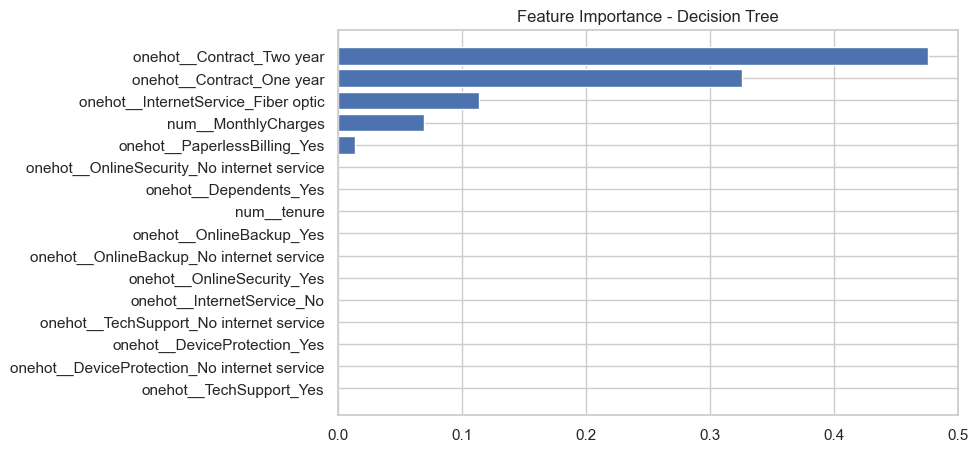

In [87]:
# feature importance
feature_names = final_pipe.named_steps['preprocess'].get_feature_names_out()
importances = final_pipe.named_steps['model'].feature_importances_

fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(fi_df)

plt.figure(figsize=(8, 5))
plt.barh(fi_df['Feature'], fi_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance - Decision Tree")
plt.show()

**Insights Bisnis:**

- Model sangat bergantung pada tipe kontrak, menunjukkan loyalitas pelanggan terkait komitmen jangka waktu
- Layanan teknis seperti TechSupport, DeviceProtection, OnlineBackup memiliki importance yang sangat rendah
- Lama berlangganan (num__tenure) tidak terlalu berpengaruh dibanding kontrak

## Confusion Matrix

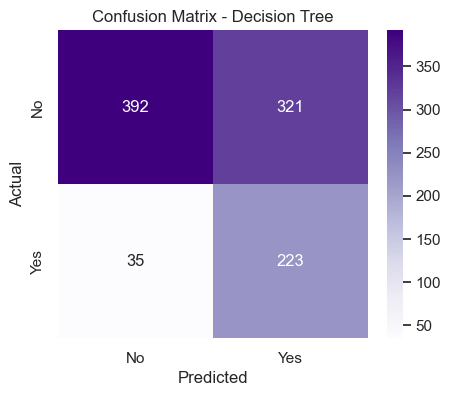

In [88]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

|                        | Prediksi Tidak Churn | Prediksi Churn |
| ---------------------- | -------------------- | -------------- |
| **Aktual Tidak Churn** | TN = 392             | FP = 321       |
| **Aktual Churn**       | FN = 35              | TP = 223       |


**Recall mencapai 86,4%**, artinya model mampu mendeteksi 86.43% pelanggan yang benar-benar churn. Ini sangat penting untuk bisnis karena semakin tinggi recall, semakin sedikit pelanggan yang lolos tanpa ditandai sebagai risiko churn.

**Precision 41%**, artinya dari seluruh pelanggan yang diprediksi churn, hanya 41% yang benar-benar churn. Masih cukup rendah, sehingga ada banyak false positive (pelanggan sehat yang dianggap akan churn).

---

## Business Simulation

Asumsi:
Rata-rata pendapatan pelanggan per bulan: $70

Pelanggan aktif bertahan rata-rata: 6 bulan

Nilai seumur hidup pelanggan (Customer Lifetime Value / CLV):

**$70 × 6 = $420**

FN = pelanggan yang sebenarnya akan churn, tetapi model memprediksi akan tetap bertahan → peluang untuk menyelamatkan pelanggan ini hilang.

FP = pelanggan yang sebenarnya tidak akan churn, tapi diprediksi akan churn → biaya retensi tidak perlu (anggap biaya retensi $20 per pelanggan).

| Kategori                 | Jumlah Kasus | Dampak per Kasus       | Total Dampak  |
| ------------------------ | ------------ | ---------------------- | ------------- |
| **False Negative (FN)**  | 35           | Kehilangan CLV = \$420 | **-\$14,700** |
| **False Positive (FP)**  | 321           | Biaya retensi = \$20   | **-\$6,420**    |



- **Kerugian dari FN jauh lebih besar dibanding FP.**

- **Setiap FN membuat perusahaan kehilangan potensi pendapatan $420, sedangkan FP hanya menyebabkan biaya tambahan $20.**

- **Mengurangi FN akan memberikan penghematan signifikan karena saving 1 FN sama dengan menghindari kerugian 21× lipat dibanding 1 FP.**

---

## Model Summary

Model yang dikembangkan tentunya tidak sempurna, maka dari itu terdapat batasan-batasan seperti berikut:

- Data historis mungkin tidak mencakup semua faktor churn terbaru (misalnya, promo baru, persaingan baru, isu layanan terkini).

- FP masih tinggi, sehingga biaya retensi membengkak.

- Tidak ada variabel waktu (seasonality) atau interaksi pelanggan yang lebih granular (misalnya, data log aktivitas harian).

Model ini dapat dipercaya jika:

- Tujuan utama adalah mengidentifikasi sebanyak mungkin pelanggan yang akan churn.

- Perusahaan siap menerima false positive yang tinggi (FP) demi mengurangi FN.

- Data yang digunakan memiliki distribusi dan pola yang mirip dengan data pelatihan (tidak ada pergeseran data/ data drift).


dan kurang dapat dipercaya jika:

- Fokus utama adalah efisiensi biaya retensi (karena FP tinggi berarti biaya retensi diberikan ke pelanggan yang sebenarnya tidak churn).

- Ada perubahan signifikan dalam produk, layanan, atau kebiasaan pelanggan yang tidak tercakup di data pelatihan.

- Model digunakan jauh di luar periode data terakhir (misal, 1-2 tahun setelah training) tanpa retraining.

Rekomendasi perbaikan:

- Data: Tambahkan variabel perilaku pelanggan (usage pattern, complaint history) dan tambahkan data terbaru secara berkala untuk retraining.

- Model: Coba tuning hyperparameter dengan kombinasi lebih banyak atau gunakan GridSearchCV

- Evaluasi: Lakukan monitoring berkala terhadap data drift.

## Business Recommendations

- Retensi proaktif untuk pelanggan kontrak bulanan: Model menunjukkan bahwa durasi kontrak adalah prediktor utama churn. Pelanggan dengan kontrak jangka pendek perlu dihubungi lebih awal untuk ditawarkan insentif perpanjangan kontrak, seperti diskon atau upgrade layanan.

- Segmentasi khusus untuk pelanggan Fiber optic: Walaupun layanan ini premium, churn tetap tinggi. Perusahaan dapat melakukan survei kepuasan dan menawarkan paket bundling untuk meningkatkan loyalitas.

- Pengendalian MonthlyCharges: Biaya bulanan yang tinggi menjadi faktor churn. Skema harga fleksibel atau paket personalisasi dapat menurunkan risiko churn terutama bagi pelanggan sensitif harga.

- Prioritaskan FN dalam intervensi: FN hanya 35, tetapi setiap pelanggan bernilai rata-rata $70 per bulan, sehingga potensi kehilangan per tahun adalah 35 × $70 × 6 = $14.700. Mengurangi FN sebesar 50% saja bisa menghemat hampir $7.500 per tahun.

- Evaluasi FP untuk efisiensi biaya: FP cukup tinggi (321), artinya banyak pelanggan yang diprediksi churn padahal tidak. Walau ini hanya menjadi fokus sekunder, pengurangannya akan menghemat biaya retensi yang tidak perlu.